In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

from scipy import interp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils import shuffle
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from numpy import set_printoptions
from pycm import *

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
set_printoptions(precision=3)
pd.set_option('display.max_rows', 1000)
data = pd.read_csv("C:\\Users\\Smart Tablets\\Desktop\\KEYSTROKE AUTHENTICATION PROJECT//DS//KEYSTROKES.csv")


#data.keys()
data.head()
array = data.values

X=data.drop(labels='subject',axis=1)
X.fillna(X.mean())
y=data['subject']
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape , y_train.shape,y_test.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
################################################################################################################
################################################################################################################
def run_RF(X_train, X_test, y_train, y_test):
    start =  time.process_time()
    clf = RandomForestClassifier(max_depth=30, n_estimators=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('RF____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_RF_results"))
################################################################################################################
################################################################################################################
def run_DT(X_train, X_test, y_train, y_test):
    start =time.process_time()
    clf = DecisionTreeClassifier(random_state=50)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('DT____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_DT_results"))
################################################################################################################
################################################################################################################
def run_NB(X_train, X_test, y_train, y_test):
    start =  time.process_time()
    clf = GaussianNB(var_smoothing=0.0001519911082952933)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    print('NB____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_NB_results"))
################################################################################################################
################################################################################################################
def run_SVM(X_train, X_test, y_train, y_test):
    start = time.process_time()
    clf = SVC(C=10, gamma=1, kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('SVM____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_SVM_results"))
################################################################################################################
################################################################################################################
def run_KNN(X_train, X_test, y_train, y_test):
    start = time.process_time()
    clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    print('KNN____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_KNN_results"))
################################################################################################################
################################################################################################################

In [4]:
start = time.process_time()
trainedforest = RandomForestClassifier(max_depth=30, n_estimators=200).fit(X_train,y_train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

69.0
[[74  0  0 ...  0  0  0]
 [ 0 84  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  0 82  0]
 [ 0  0  0 ...  0  0 74]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        76
           5       1.00      1.00      1.00        78
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        73
           9       1.00      0.99      0.99        85
          10       1.00      1.00      1.00        85
          11       1.00      1.00      1.00        87
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        78
          15       1.00     

D15-DD    0.055043
D15-UD    0.046421
D15-UU    0.034524
D6-UD     0.023419
D3-UU     0.021264
D10-DD    0.020946
D3-UD     0.020257
D5-UU     0.019789
D2-DD     0.019279
D6-DU     0.019156
D4-UD     0.019063
D7-DD     0.018742
D4-UU     0.018485
D7-UD     0.018117
D7-DU     0.017920
D4-DD     0.017633
D5-DD     0.017595
D7-UU     0.017537
D1-DU     0.016808
D3-DU     0.016198
U11-H     0.016028
D2-DU     0.015706
D6-DD     0.015553
D1-UD     0.015027
D10-DU    0.013873
D3-DD     0.013817
U3-H      0.013754
D4-DU     0.013691
D6-UU     0.013592
D5-UD     0.011970
U10-H     0.011860
D16-DD    0.011564
D14-UU    0.011310
D2-UU     0.011204
D9-DU     0.010825
D9-UU     0.010815
U12-H     0.010723
D17-UD    0.010504
D16-UU    0.010487
U2-H      0.010316
D1-DD     0.009957
D15-DU    0.009729
D17-DD    0.009586
U5-H      0.009447
D9-DD     0.009398
D13-DU    0.009179
D12-DU    0.008935
U9-H      0.008880
D13-UU    0.008707
U8-H      0.008415
D16-DU    0.008381
U4-H      0.008267
D16-UD    0.

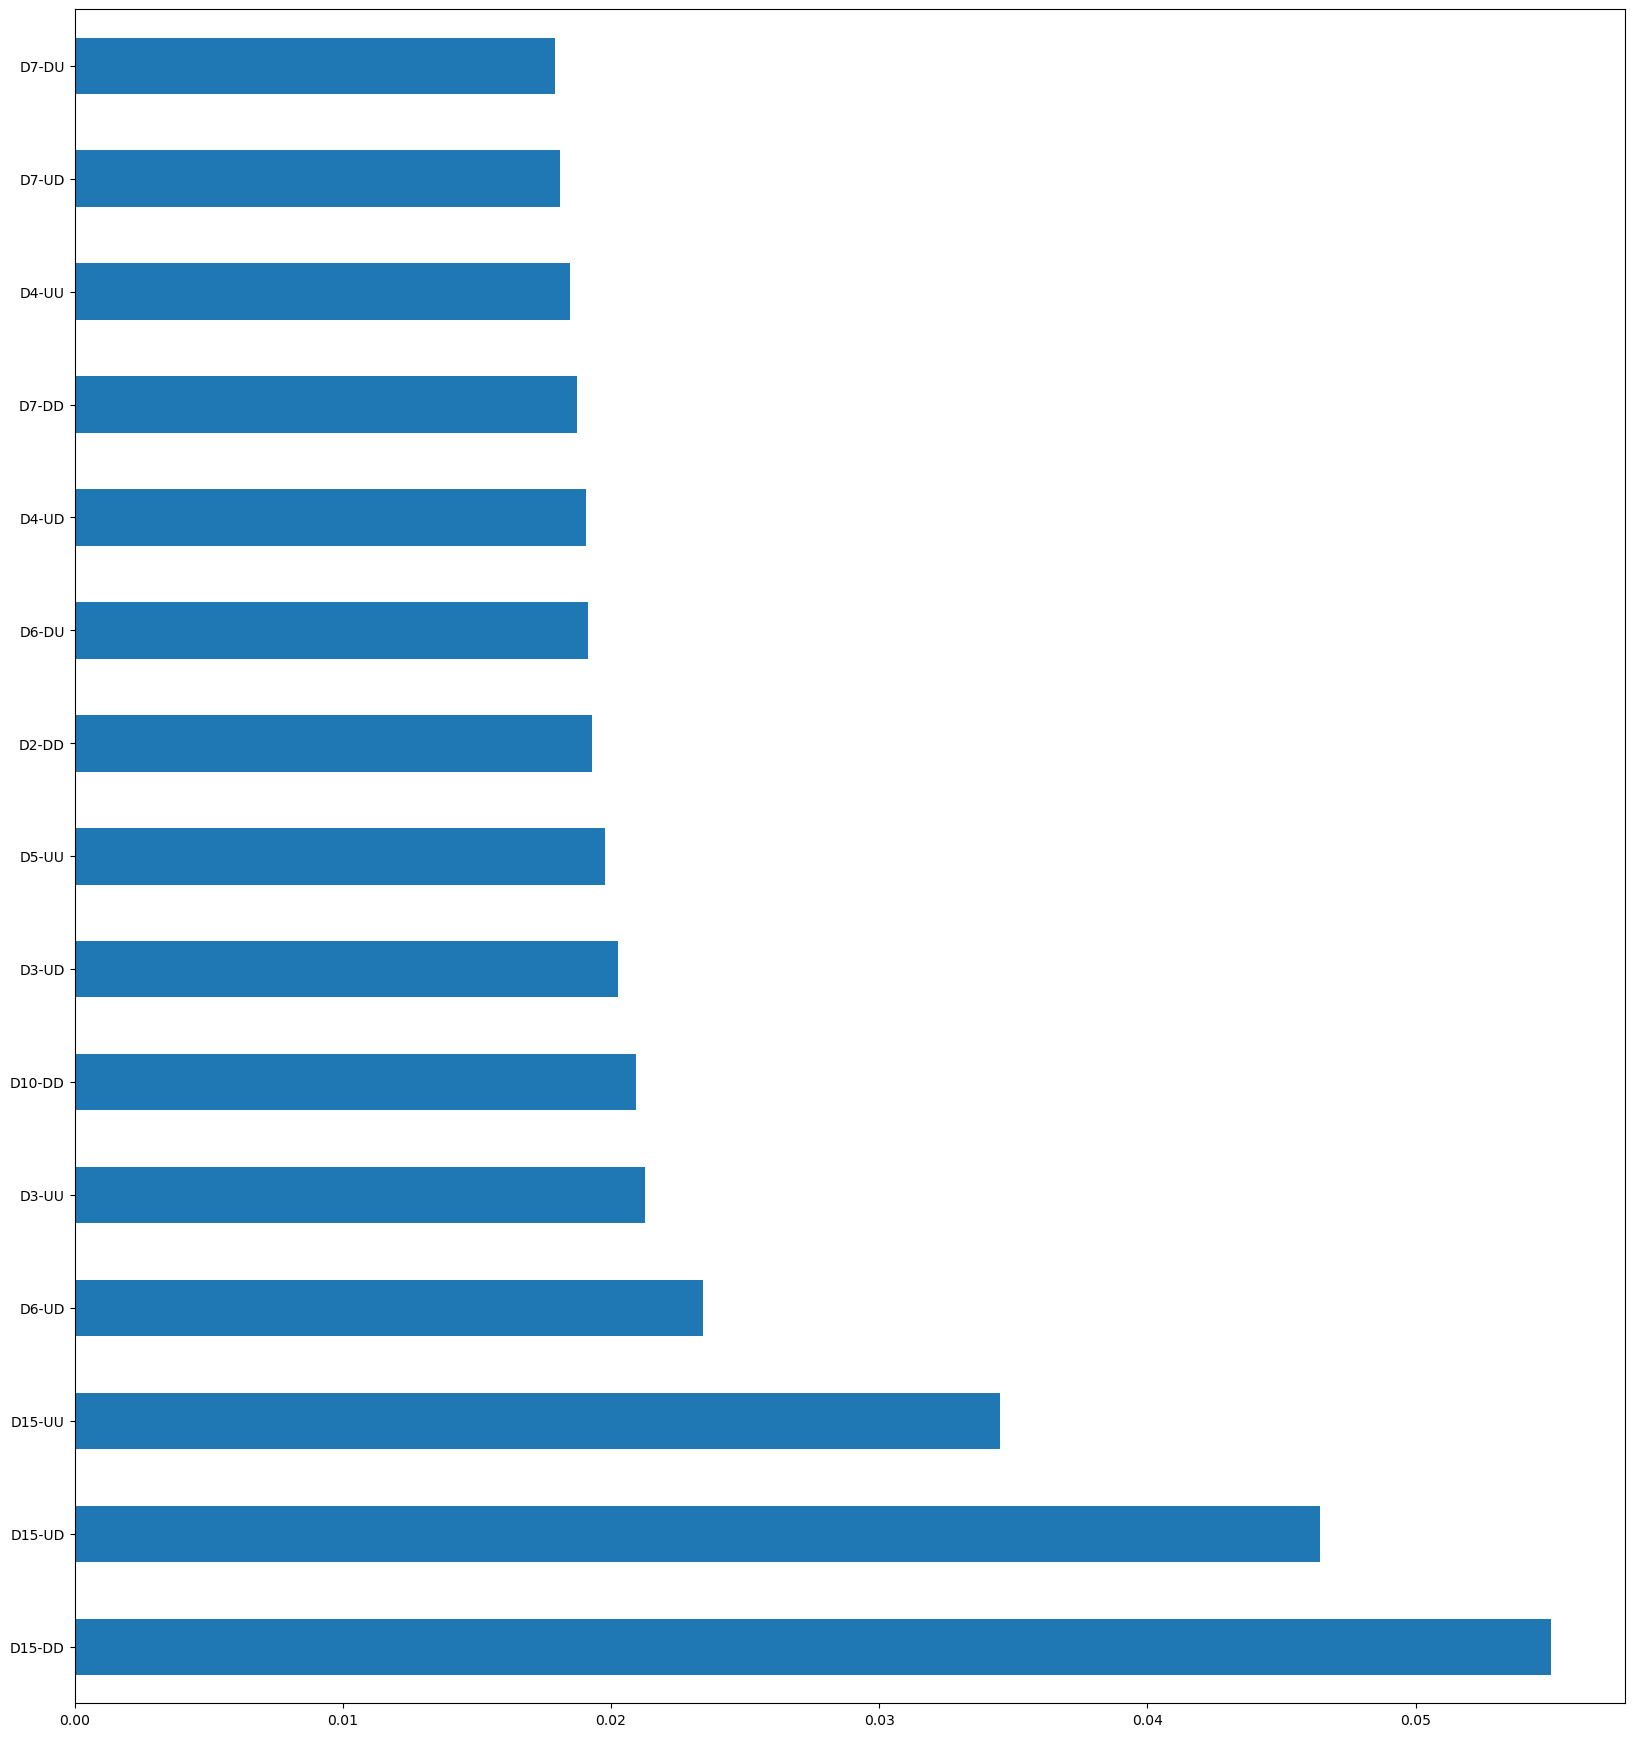

In [5]:
figure(num=None, figsize=(20, 22), dpi=100, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns).sort_values(ascending=False)
feat_importances.nlargest(15).plot(kind='barh')
feat_importances

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


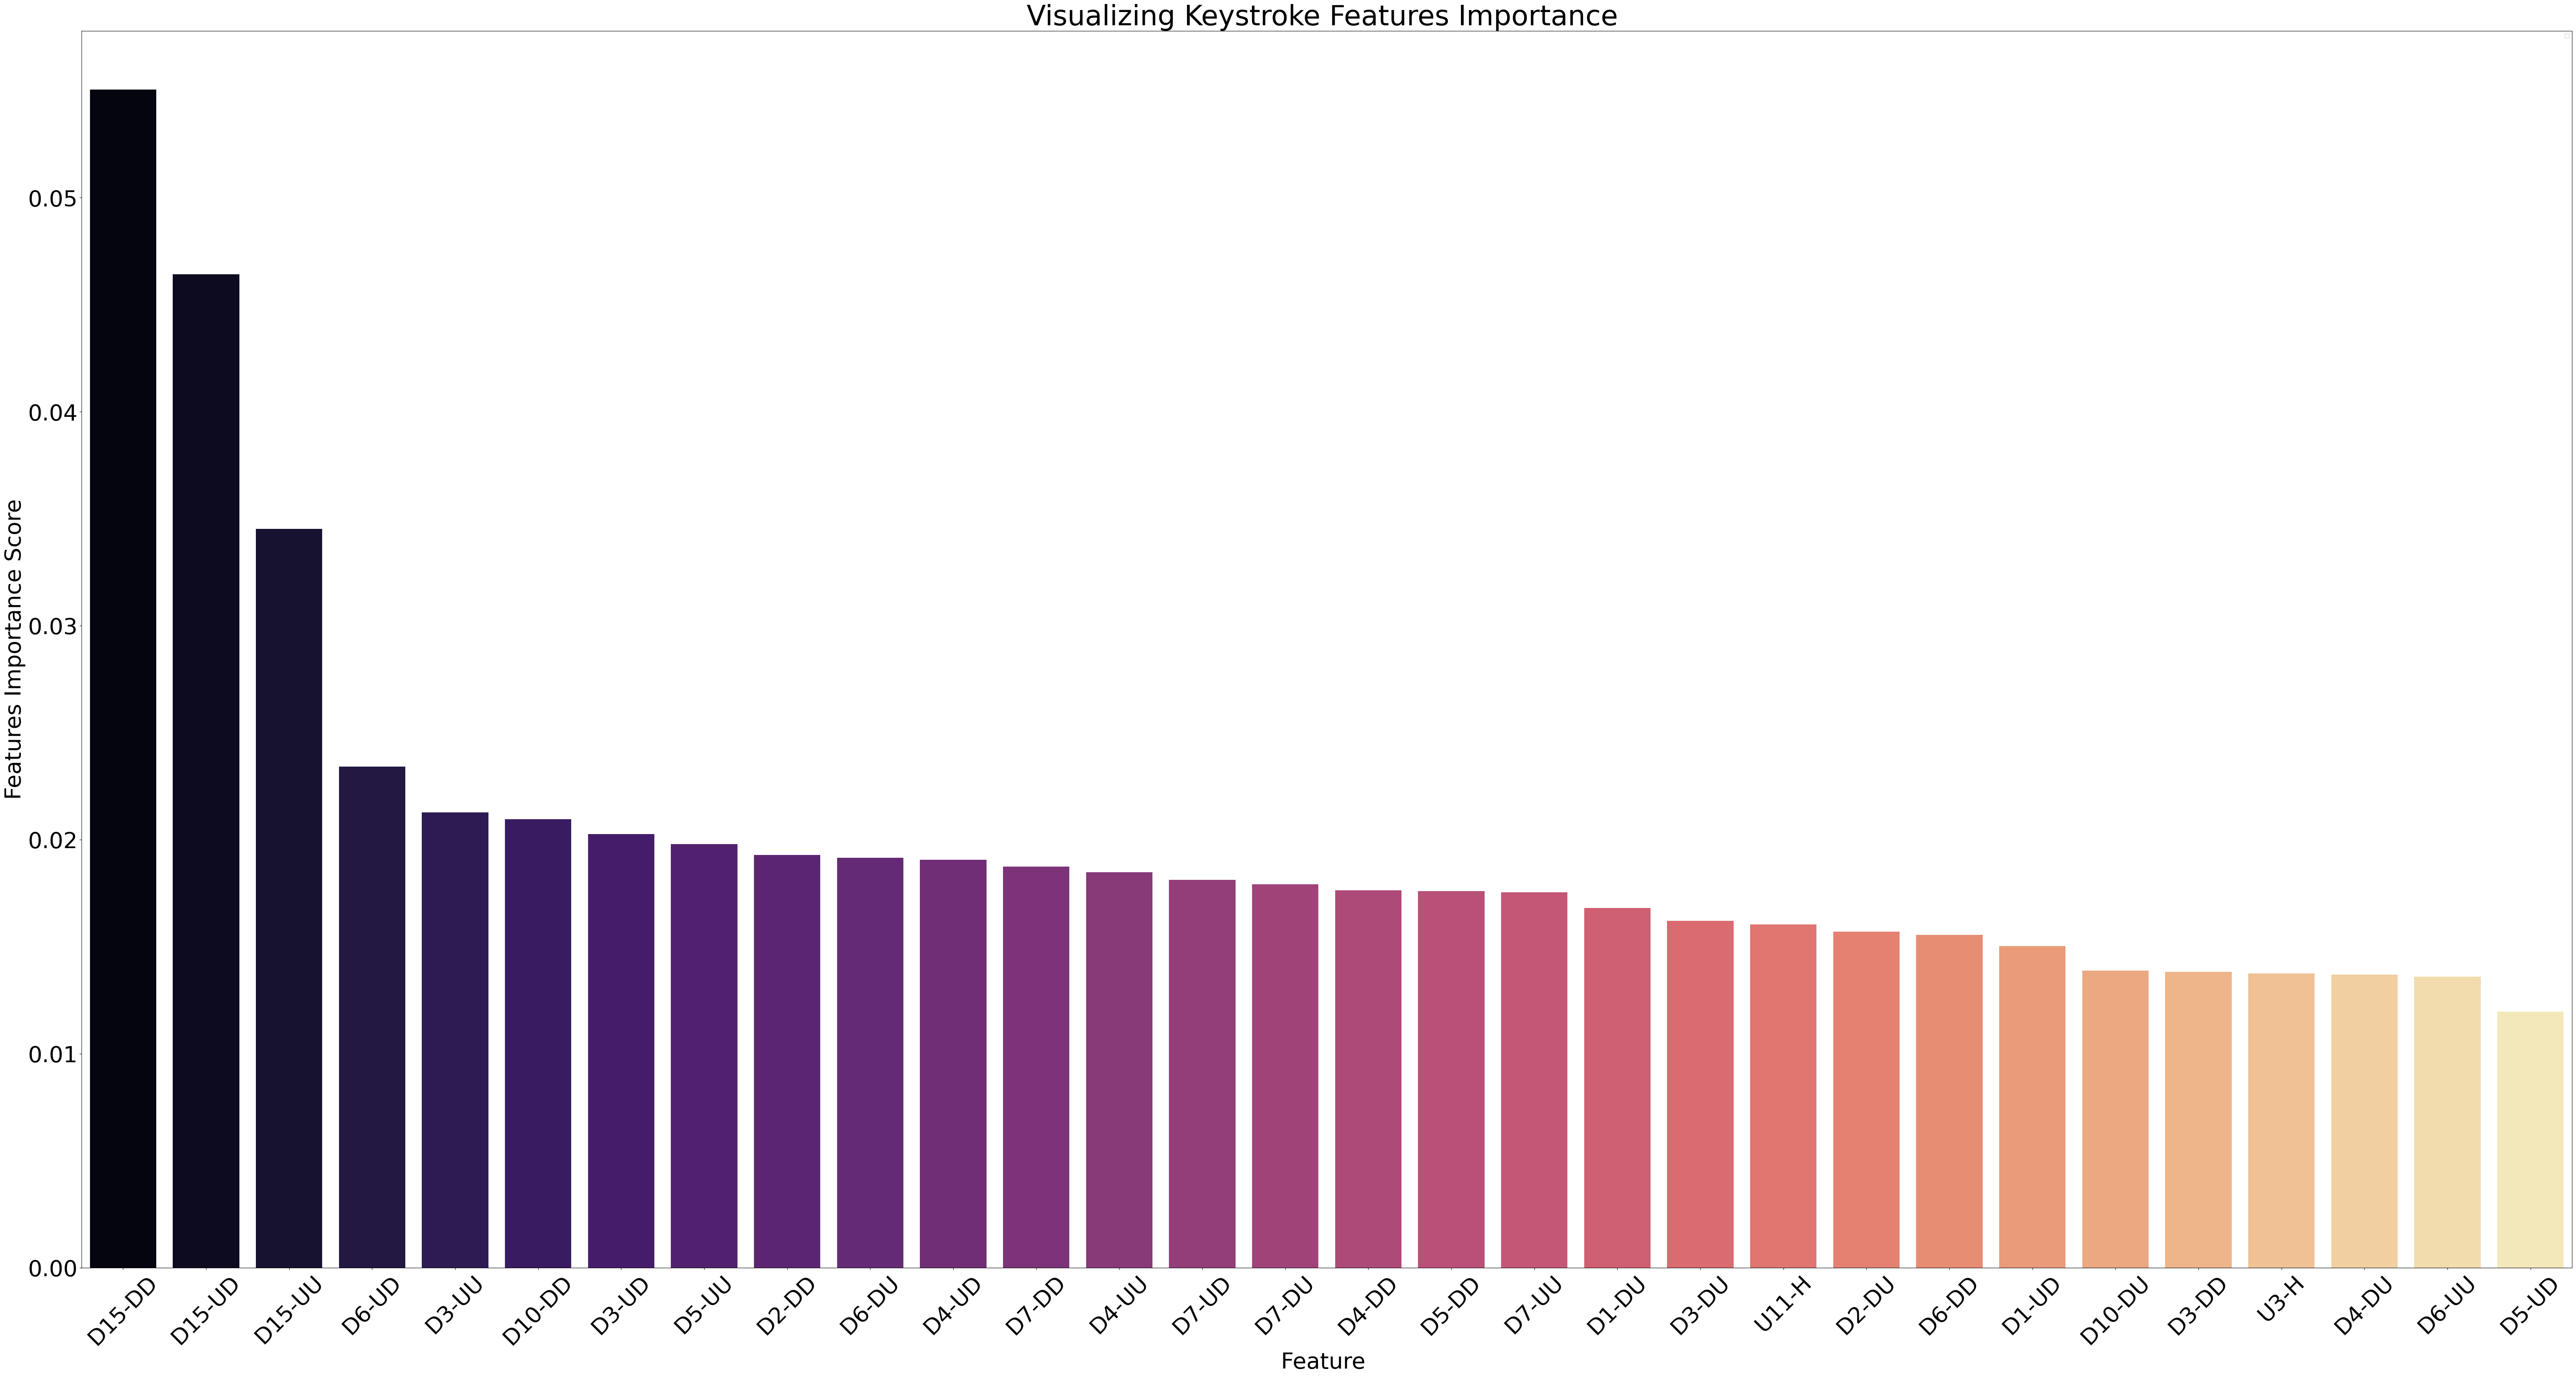

<Figure size 640x480 with 0 Axes>

In [11]:
### import matplotlib.pyplot as plt1
import seaborn as sns
import matplotlib.pyplot as plt1
%matplotlib inline
# Creating a bar plot
feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns).nlargest(30).sort_values(ascending=False)
plt1.figure(figsize=(80,40))
sns.barplot(x=feat_importances.index, y=feat_importances,palette='magma')
# Add labels to your graph
plt1.xlabel('Feature ',fontsize=40)
plt1.ylabel('Features Importance Score',fontsize=40)
plt1.title("Visualizing Keystroke Features Importance ",fontsize=50)
plt1.legend()
plt1.xticks(rotation=45,fontsize=40)
plt1.yticks(fontsize=40)
plt1.show()
plt1.savefig('KS_FEATURE_IMPORTANCE.png',bbox_inches='tight')

In [14]:
X_Reduced = X[["D15-DD","D15-UD", "D15-UU","D6-UD","D3-UU","D10-DD","D3-UD","D5-UU","D2-DD","D6-DU",
               "D4-UD","D7-DD","D4-UU","D7-UD","D7-DU","D4-DD","D5-DD","D7-UU","D1-DU","D3-DU","U11-H","D2-DU","D6-DD","D1-UD","D10-DU","D3-DD","U3-H","D4-DU","D6-UU","D5-UD"]]
#,"tanangle","areamean","pstd","areaquarts_0","minx","areaquarts_2","pquarts_1"
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, y, test_size = 0.20, 
                                                        random_state = 101)

In [15]:
run_RF(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

RF____Accuracy:  0.9917410714285714 ---TIME = 39.75 seconds ---
TEST Accuracy: 0.9917410714285714
TEST F1 score: 0.9917873179633653
TEST Recall: 0.9917374192565698
TEST  Precision: 0.991989931980414
[0.971 0.988 0.977 1.    1.    1.    1.    0.987 0.974 0.988 1.    0.99
 1.    0.986 1.    1.    0.987 1.    0.988 0.988 1.    1.    0.974 1.
 1.    1.    0.988 0.986 1.    1.    1.    1.    0.988 1.    1.    1.
 0.987 0.985 1.    1.    1.    0.932 1.    1.    0.957 0.99  1.    1.
 0.978 1.    1.    0.976 0.986 1.    0.988 1.   ]


NameError: name 'os' is not defined

In [11]:
run_SVM(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

SVM____Accuracy:  0.9397321428571429 ---TIME = 4.03125 seconds ---
TEST Accuracy: 0.9397321428571429
TEST F1 score: 0.9396131944378782
TEST Recall: 0.9401396641598623
TEST  Precision: 0.9402043184776376
[0.927 0.978 0.863 0.938 0.977 0.816 0.951 1.    0.803 0.882 0.986 0.957
 0.979 0.939 0.963 1.    0.945 0.975 0.966 1.    0.989 0.905 0.895 0.971
 1.    0.865 0.976 0.9   0.986 0.97  0.961 0.83  0.883 0.928 0.988 0.937
 0.865 0.987 0.965 0.961 0.976 0.845 0.985 0.977 0.838 0.939 1.    0.941
 0.975 0.941 0.945 0.878 0.967 0.958 0.92  0.953]



In [12]:
run_NB(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

NB____Accuracy:  0.8078125 ---TIME = 0.0625 seconds ---
TEST Accuracy: 0.8078125
TEST F1 score: 0.8062666604591783
TEST Recall: 0.8076571499069993
TEST  Precision: 0.8154006019601067
[0.792 0.778 0.452 0.778 0.92  0.803 0.84  0.905 0.539 0.682 0.819 0.84
 0.875 0.848 0.915 0.9   0.912 0.938 0.943 1.    0.967 0.432 0.744 0.826
 1.    0.716 0.714 0.7   0.871 0.985 0.947 0.553 0.681 0.812 0.965 0.722
 0.689 0.896 0.942 0.935 0.835 0.835 0.91  0.693 0.825 0.646 0.918 0.871
 0.863 0.882 0.603 0.554 0.883 0.917 0.627 0.788]



In [13]:
run_DT(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

DT____Accuracy:  0.8986607142857143 ---TIME = 0.515625 seconds ---
TEST Accuracy: 0.8986607142857143
TEST F1 score: 0.8978405567554876
TEST Recall: 0.8988111383227785
TEST  Precision: 0.8985040028982606
[0.885 0.967 0.808 0.963 0.943 0.868 0.889 0.929 0.816 0.824 0.833 0.894
 0.917 0.939 0.927 0.912 0.857 0.901 0.955 0.962 0.946 0.743 0.884 0.841
 0.952 0.865 0.905 0.786 0.9   0.97  0.961 0.872 0.734 0.899 0.941 0.886
 0.932 0.883 0.977 0.961 0.965 0.845 0.985 0.909 0.825 0.866 0.959 0.882
 0.95  0.918 0.863 0.878 0.85  0.986 0.92  0.906]



In [14]:
run_KNN(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

KNN____Accuracy:  0.9714285714285714 ---TIME = 1.5625 seconds ---
TEST Accuracy: 0.9714285714285714
TEST F1 score: 0.9711237675579979
TEST Recall: 0.9718887003136081
TEST  Precision: 0.9706620137457929
[0.958 0.978 0.973 0.975 0.977 0.974 0.951 1.    0.934 0.941 0.986 0.979
 0.969 0.985 1.    0.975 0.956 1.    1.    1.    0.989 0.959 0.942 1.
 1.    0.973 0.976 0.914 1.    1.    1.    0.915 0.968 0.986 1.    0.962
 0.946 0.961 0.953 1.    0.988 0.959 1.    0.932 1.    0.963 0.986 0.988
 0.938 1.    0.918 0.905 0.967 1.    0.973 0.953]

